<a href="https://colab.research.google.com/github/JAYTRIVEDI2510/JAYTRIVEDI2510/blob/ASSIGNMENTS/Assignment_6_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bank-full.csv to bank-full.csv


In [ ]:
# Load dataset
df_bank = pd.read_csv('bank-full.csv')



In [ ]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


According to the dataset documentation, we need to remove the 'duration' column because in real-case the duration is only known after the label column is known. This problem can be considered to be 'data leakage' where predictors include data that will not be available at the time you make predictions.

In [ ]:
# Drop 'duration' column
df_bank = df_bank.drop('duration', axis=1)

In [ ]:
# print(df_bank.info())
print('Shape of dataframe:', df_bank.shape)
df_bank.head()

Shape of dataframe: (45211, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  Target     45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [ ]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

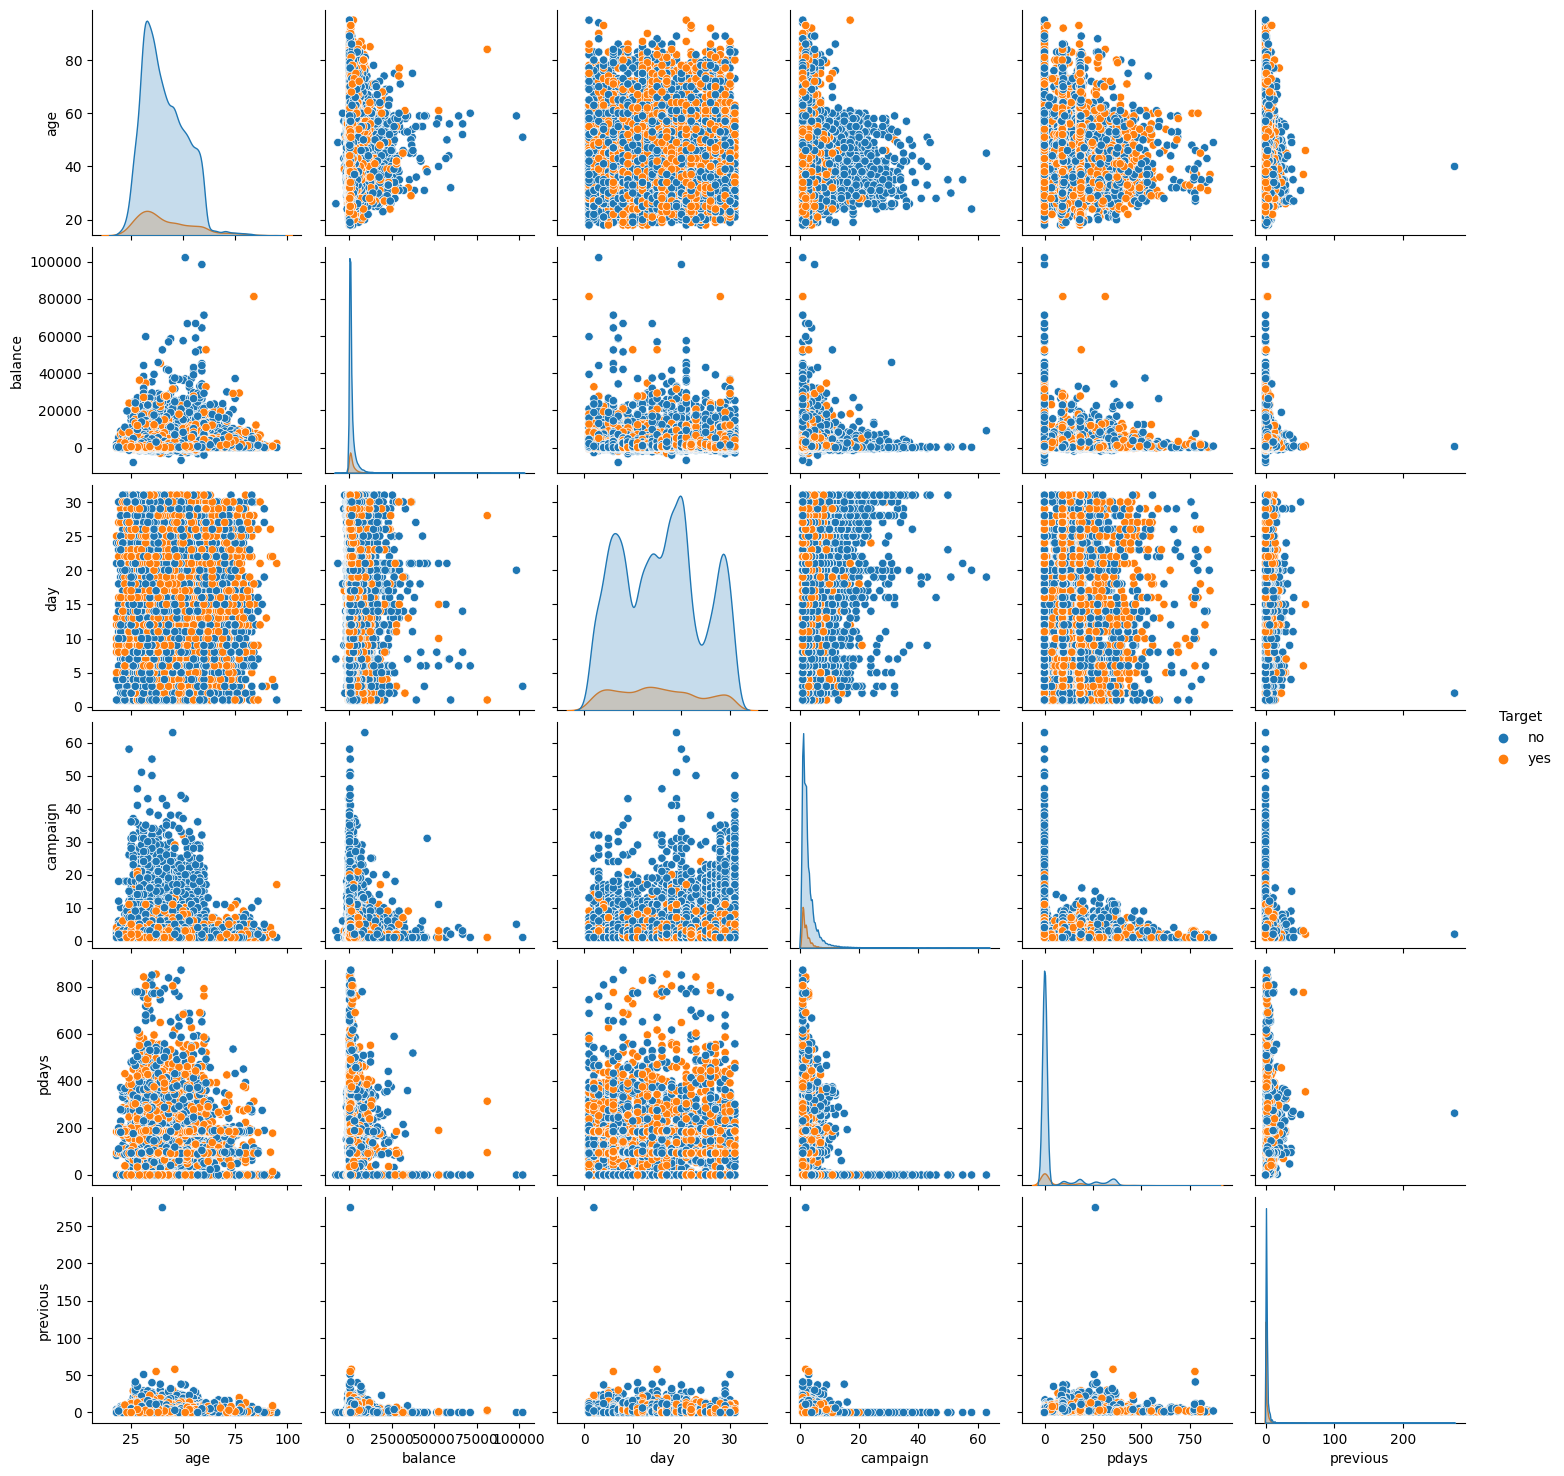

In [ ]:
sns.pairplot(df_bank, hue='Target')


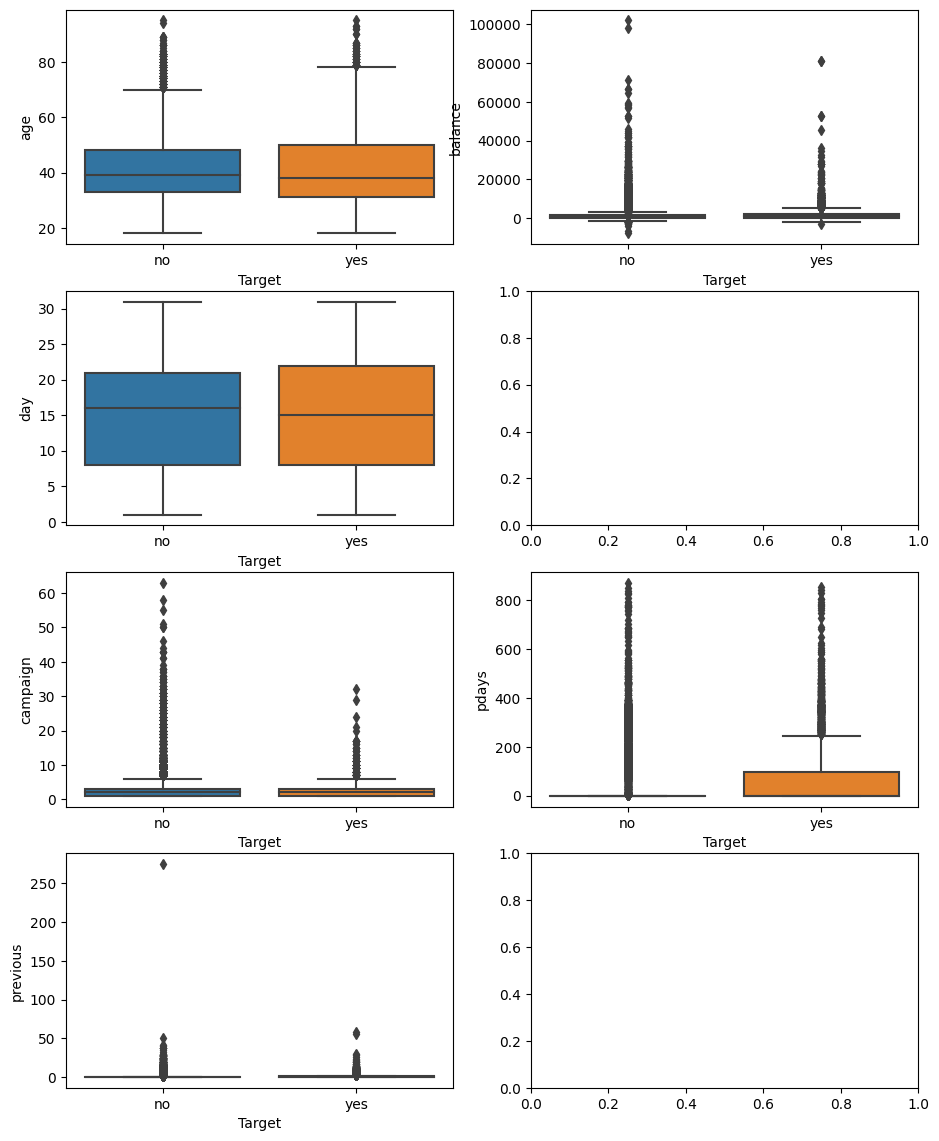

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(11,14))
sns.boxplot(x='Target', y='age', data=df_bank, ax=ax[0][0])
sns.boxplot(x='Target', y='balance', data=df_bank, ax=ax[0][1])
sns.boxplot(x='Target', y='day', data=df_bank, ax=ax[1][0])
sns.boxplot(x='Target', y='campaign', data=df_bank, ax=ax[2][0])
sns.boxplot(x='Target', y='pdays', data=df_bank, ax=ax[2][1])
sns.boxplot(x='Target', y='previous', data=df_bank, ax=ax[3][0]);

In [ ]:
# One-Hot Encoding of categrical variables
df_bank_1=pd.get_dummies(df_bank,columns=['job','marital','education','default','housing','loan','contact','poutcome','month','Target'])
df_bank_1

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,Target_no,Target_yes
0,58,2143,5,1,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,33,2,5,1,-1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,47,1506,5,1,-1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,33,1,5,1,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,3,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45207,71,1729,17,2,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45208,72,5715,17,5,184,3,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45209,57,668,17,4,-1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
df_bank_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   campaign             45211 non-null  int64
 4   pdays                45211 non-null  int64
 5   previous             45211 non-null  int64
 6   job_admin.           45211 non-null  uint8
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

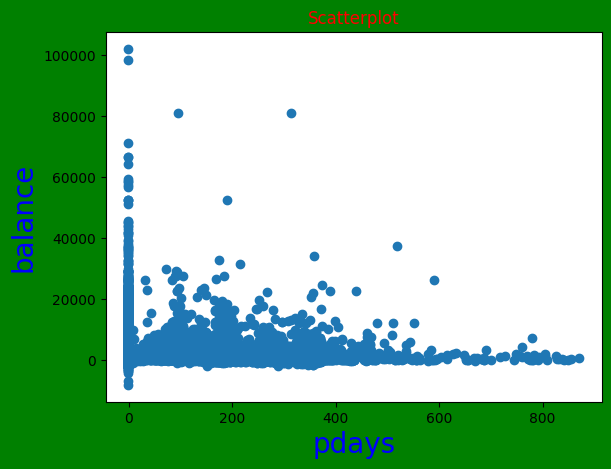

In [ ]:
plt.figure(facecolor="green")
plt.scatter(df_bank_1.pdays,df_bank_1.balance,marker='o')
plt.title("Scatterplot",color="red")
plt.xlabel("pdays",color="blue",size=20)
plt.ylabel("balance",color="blue",size=20)
plt.show()

In [ ]:
#Logestic Regration



from sklearn.linear_model import LogisticRegression

In [ ]:
# Dividing our data into input and output variables
x=df_bank_1.iloc[:,0:51]


In [ ]:
x

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,Target_no
0,58,2143,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,33,2,5,1,-1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,47,1506,5,1,-1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,33,1,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,3,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45207,71,1729,17,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45208,72,5715,17,5,184,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45209,57,668,17,4,-1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
y=df_bank_1.iloc[:,51]

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target_yes, Length: 45211, dtype: uint8

In [ ]:
x.axes

[RangeIndex(start=0, stop=45211, step=1),
 Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin.',
        'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
        'job_management', 'job_retired', 'job_self-employed', 'job_services',
        'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
        'marital_divorced', 'marital_married', 'marital_single',
        'education_primary', 'education_secondary', 'education_tertiary',
        'education_unknown', 'default_no', 'default_yes', 'housing_no',
        'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
        'contact_telephone', 'contact_unknown', 'poutcome_failure',
        'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'month_apr',
        'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
        'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
        'month_sep', 'Target_no'],
       dtype='object')]

In [ ]:
y.axes

[RangeIndex(start=0, stop=45211, step=1)]

In [ ]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [ ]:
#Predict for X dataset
y_pred = classifier.predict(x)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [ ]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': y_pred})

In [ ]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,0


In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[39731   191]
 [ 1269  4020]]


In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     39922
           1       0.95      0.76      0.85      5289

    accuracy                           0.97     45211
   macro avg       0.96      0.88      0.91     45211
weighted avg       0.97      0.97      0.97     45211



In [ ]:
(39725+4026)/(39725+197+1263+4026)

0.9677069739665126

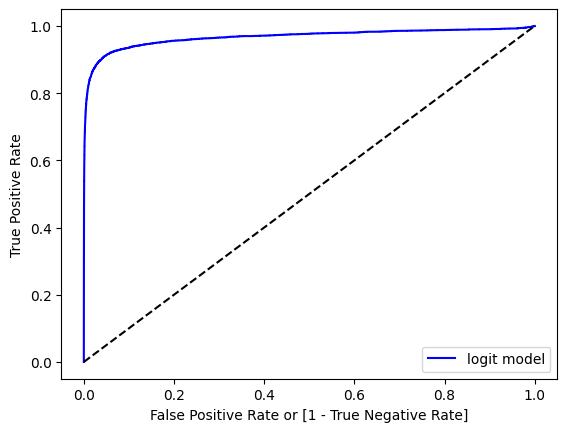

auc accuracy: 0.8776418681772622


In [ ]:
#ROC Curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='blue', label='logit model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('auc accuracy:',auc)